In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# A few things for trial and error:

* Grayscale conversion and its effect on the dataset
* Normalisation
* Data Augmentation
* Image standardization

https://www.section.io/engineering-education/image-preprocessing-in-python/

In [14]:
# First, let's get the file paths to important locations
data_exp_path = os.getcwd()
repo_path = os.path.abspath(os.path.join(data_exp_path, '../'))
data_path = os.path.abspath(os.path.join(repo_path, '../data'))
augmented_dataset = os.path.abspath(os.path.join(data_path, 'AugmentedAlzheimerDataset'))
original_dataset = os.path.abspath(os.path.join(data_path, 'OriginalDataset'))

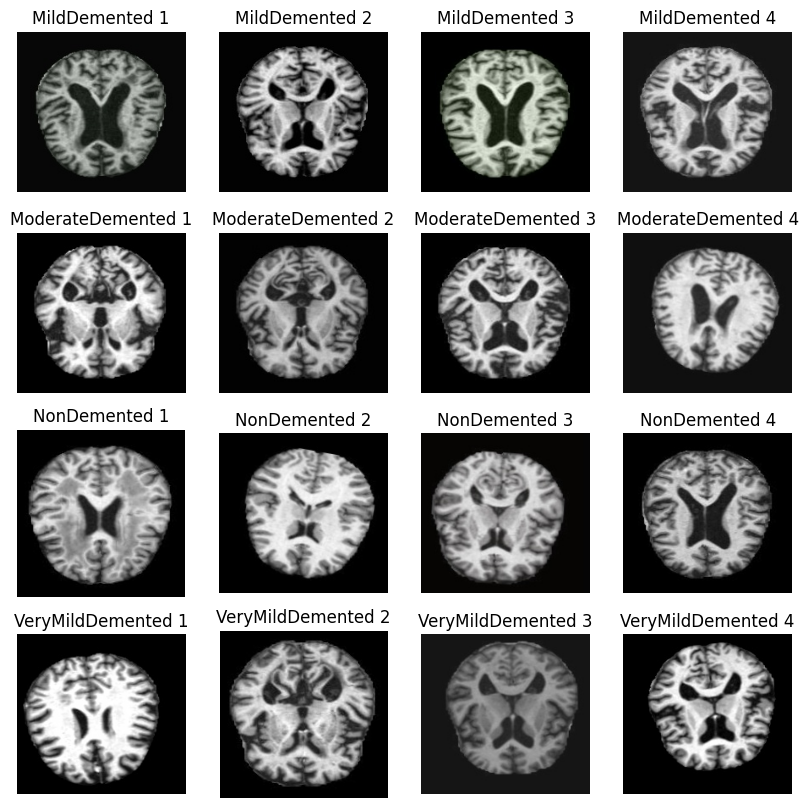

In [52]:
# Recall that we have 'AugmentedAlzheimerDataset' and 'OriginalDataset' options

# let's explore the Augmented Dataset
mild_aug_path = os.path.abspath(os.path.join(augmented_dataset, 'MildDemented')) + '\\'
mod_aug_path = os.path.abspath(os.path.join(augmented_dataset, 'ModerateDemented')) + '\\'
healthy_aug_path = os.path.abspath(os.path.join(augmented_dataset, 'NonDemented')) + '\\'
v_mild_aug_path = os.path.abspath(os.path.join(augmented_dataset, 'VeryMildDemented')) + '\\'
os.listdir(mild_aug_path)[0:5]

#plt.imshow(plt.imread(os.path.abspath(os.path.join(mild_aug_path, os.listdir(mild_aug_path)[0]))))

classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

fig = plt.figure(figsize=(10,10))

for row, level in enumerate(classes):
    current_path = augmented_dataset + '\\' + level + '\\'
    num_images = len(os.listdir(current_path))
    image_group = [plt.imread(current_path + os.listdir(current_path)[(i * num_images) // 4]) for i in range(4)]
    
    for i in range(len(image_group)):
        fig.add_subplot(len(classes), 4, row * len(classes) + i + 1)
        plt.axis('off')
        title = level + ' ' + str(i + 1)
        plt.title(title)
        plt.imshow(image_group[i])

# Section 01: Grayscale Conversion

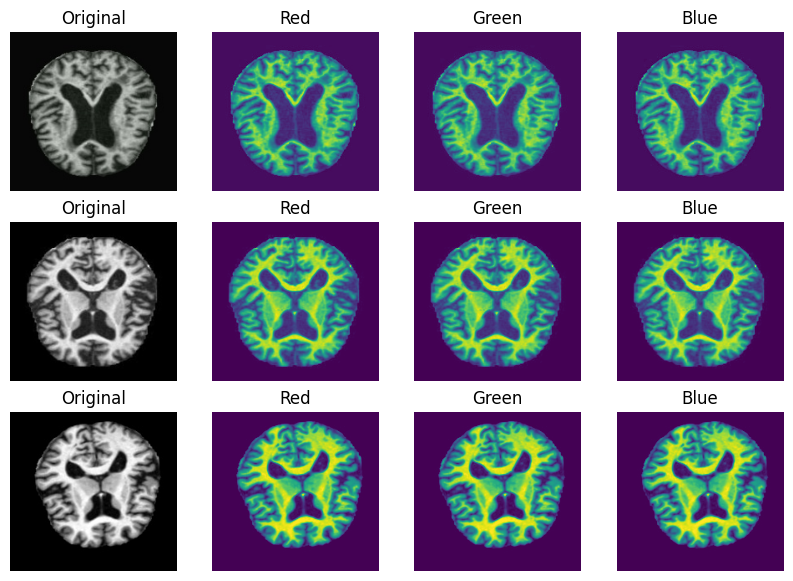

In [58]:
# To get a concrete example, let's examine MildDemented1, ModerateDemented4, and VeryMildDemented3
current_path = augmented_dataset + '\\MildDemented\\'
num_images = len(os.listdir(current_path))
MildDemented1 = current_path + os.listdir(current_path)[(0 * num_images) // 4]

current_path = augmented_dataset + '\\ModerateDemented\\'
num_images = len(os.listdir(current_path))
ModerateDemented4 = current_path + os.listdir(current_path)[(2 * num_images) // 4]

current_path = augmented_dataset + '\\VeryMildDemented\\'
num_images = len(os.listdir(current_path))
VeryMildDemented3 = current_path + os.listdir(current_path)[(3 * num_images) // 4]

decomp_list = [MildDemented1, ModerateDemented4, VeryMildDemented3]
decomp_list = [plt.imread(x) for x in decomp_list]

fig = plt.figure(figsize=(10,7))

for index, image in enumerate(decomp_list):
    fig.add_subplot(3, 4, index * 4 + 1)
    plt.axis('off')
    plt.title('Original')
    plt.imshow(image)
    
    fig.add_subplot(3, 4, index * 4 + 2)
    plt.axis('off')
    plt.title('Red')
    plt.imshow(image[:,:,0])
    
    fig.add_subplot(3, 4, index * 4 + 3)
    plt.axis('off')
    plt.title('Green')
    plt.imshow(image[:,:,1])
    
    fig.add_subplot(3, 4, index * 4 + 4)
    plt.axis('off')
    plt.title('Blue')
    plt.imshow(image[:,:,2])

### How can we tell if an image is grayscale?

An JPEG image is grayscale if it has 1 channel... we can see below that our images have 3 (R G B)
We can still check to see if our images are grayscale - but not represented that way in the traditional sense - by
checking to see if for every pixel in the images, R == G == B

This is quite a tedious process, but it is a worthwhile exercise to figure out if we need additional processing

In [62]:

print(len(decomp_list[0].shape))

3


In [83]:
def check_grayscale(image):
    """
    This function runs through all pixels in an image and determines if it is gray
    @param image: matrix representation of an image
    @return: True if grayscale, False if not
    """
    x, y, c = image.shape
    counter = 0
    return_val = True
    for xi in range(x):
        for yi in range(y):
            r, g, b = image[xi][yi]
            if r!= g != b:
                counter += 1
                return_val = False
    return return_val, counter

result = check_grayscale(decomp_list[0])

if result[0]:
    print("Grayscale")
else:
    print("{:.2f}% pixels not grayscale".format(result[1] * 100 / (decomp_list[0].shape[0]*decomp_list[0].shape[1])))

52.23% pixels not grayscale


### Above, we illustrated how RGB can be combined to from grayscale images
### It looks like all images are already grayscale, but let's do a quick verification

# Normalisation

# Image Standardization